In [77]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("./final_input/rt.csv")

In [4]:
df = data[data["temp"]<50]

In [5]:
Y = df["temp"]
data_Y = np.array(Y.tolist())
data_Y

array([30.883 , 28.089 , 33.555 , ..., 24.0185, 22.449 , 32.1185])

In [6]:
df.drop(df.columns[[0, 1]], axis=1, inplace=True)

/Users/carnivalbug/Library/Python/2.7/lib/python/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [7]:
data_X = df.values

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.2, random_state=42)
y_train  = y_train.astype(float)
y_test  = y_test.astype(float)
batch_size =len(X_train)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape )

((42168, 16), (42168,), (10543, 16), (10543,))


In [69]:
from tensorflow.keras.models import Sequential, Model, load_model, save_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense, Activation, Dropout, Input, Masking, TimeDistributed, LSTM, Conv1D, Embedding
from tensorflow.keras.layers import GRU, Bidirectional, BatchNormalization, Reshape
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.layers import Reshape, Dropout, Dense,Multiply, Dot, Concatenate,Embedding
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping 

## ANN

In [125]:
classifier = Sequential()
     # better values with tanh against relu, sigmoid...
classifier.add(Dense(64, activation = 'tanh', input_dim = 16)) 
classifier.add(Dropout(0.2))
classifier.add(Dense(32, activation='relu')) 
classifier.add(Dropout(0.2))
classifier.add(Dense(8, activation='relu')) 
classifier.add(Dropout(0.2))
classifier.add(Dense(1))
classifier.compile(optimizer = 'sgd', loss = 'mean_absolute_error')

In [126]:
history_mse = classifier.fit(data_X, data_Y, epochs = 100, verbose = 0, validation_split = 0.2)

In [127]:
score_mse_test = classifier.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)

score_mse_train = classifier.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

10543/10543 [==============================] - 0s 19us/sample - loss: 3.7679
('Test Score:', 3.7679259575126767)
42168/42168 [==============================] - 1s 18us/sample - loss: 3.7057
('Train Score:', 3.705663742817369)


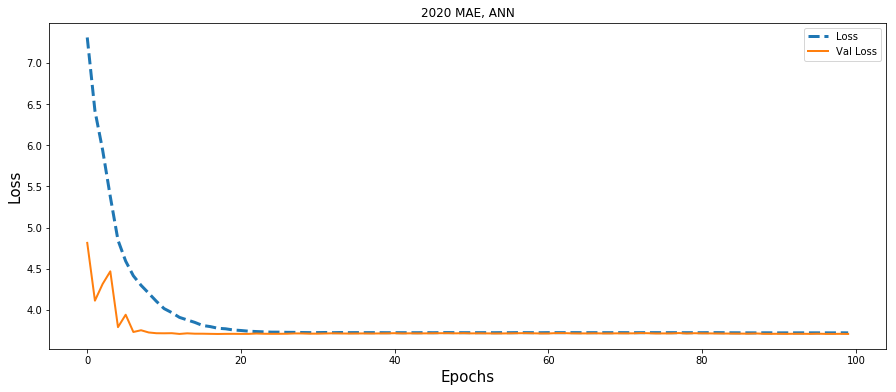

In [129]:
plt.figure(figsize=(15, 6))
plt.plot(history_mse.history['loss'], lw =3, ls = '--', label = 'Loss')
plt.plot(history_mse.history['val_loss'], lw =2, ls = '-', label = 'Val Loss')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.title('2020 MAE, ANN')
plt.legend()

In [135]:
classifier = Sequential()
     # better values with tanh against relu, sigmoid...
classifier.add(Dense(64, activation = 'relu', input_dim = 16)) 
classifier.add(Dropout(0.2))
classifier.add(Dense(32, activation='relu')) 
classifier.add(Dropout(0.2))
classifier.add(Dense(8, activation='relu')) 
classifier.add(Dropout(0.2))
classifier.add(Dense(1))
classifier.compile(optimizer = 'sgd', loss = 'mean_absolute_error')

In [136]:
history_mse = classifier.fit(data_X, data_Y, epochs = 100, verbose = 0, validation_split = 0.2)

In [137]:
score_mse_test = classifier.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)

score_mse_train = classifier.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

10543/10543 [==============================] - 0s 18us/sample - loss: 3.7707
('Test Score:', 3.770698371834019)
42168/42168 [==============================] - 1s 15us/sample - loss: 3.7102
('Train Score:', 3.710249427056498)


In [139]:
classifier = Sequential()
     # better values with tanh against relu, sigmoid...
classifier.add(Dense(64, activation = 'sigmoid', input_dim = 16)) 
classifier.add(Dropout(0.2))
classifier.add(Dense(32, activation='relu')) 
classifier.add(Dropout(0.2))
classifier.add(Dense(8, activation='relu')) 
classifier.add(Dropout(0.2))
classifier.add(Dense(1))
classifier.compile(optimizer = 'sgd', loss = 'mean_absolute_error')

In [140]:
history_mse = classifier.fit(data_X, data_Y, epochs = 100, verbose = 0, validation_split = 0.2)

In [141]:
score_mse_test = classifier.evaluate(X_test, y_test)
print('Test Score:', score_mse_test)

score_mse_train = classifier.evaluate(X_train, y_train)
print('Train Score:', score_mse_train)

10543/10543 [==============================] - 0s 15us/sample - loss: 3.7679
('Test Score:', 3.767851074110746)
42168/42168 [==============================] - 1s 21us/sample - loss: 3.70430s - 
('Train Score:', 3.7043373015274748)


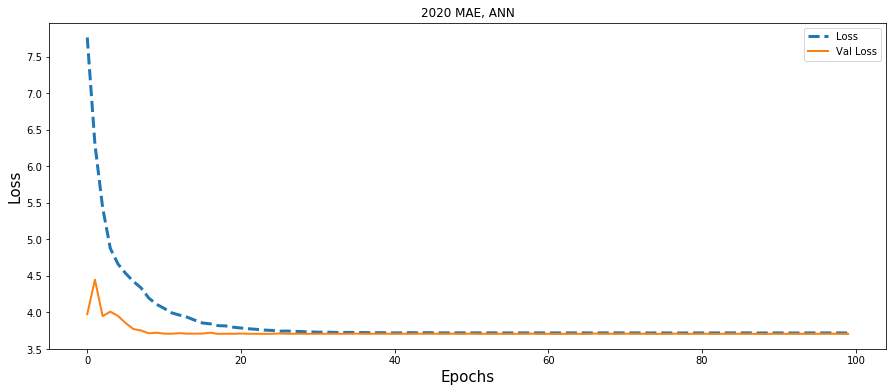

In [142]:
plt.figure(figsize=(15, 6))
plt.plot(history_mse.history['loss'], lw =3, ls = '--', label = 'Loss')
plt.plot(history_mse.history['val_loss'], lw =2, ls = '-', label = 'Val Loss')
plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.title('2020 MAE, ANN')
plt.legend()